In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import glm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
from patsy import dmatrix

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import Lasso

In [2]:
#https://archive.ics.uci.edu/ml/datasets/ILPD+(Indian+Liver+Patient+Dataset)
#Sgot Aspartate Aminotransferase
#Sgpt Alamine Aminotransferase
#TP Total Protiens
#ALB Albumin
#Alkphos Alkaline Phosphotase
#AG_Ratio Albumin and Globulin Ratio
df=pd.read_csv('indian_liver_patient.csv',names=['Age','Gender','TB_bilirubin','DB_bilirubin',
                                                    'AAP',
                                                    'Sgpt',
                                                    'Sgot',
                                                    'TP',
                                                    'ALB',
                                                    'AG_Ratio',
                                                    'Class'],header=None)
df['Target']=df.apply(lambda x: 1 if x['Class']==1 else 0,axis=1)

encoder=LabelEncoder()
df['Gender']=encoder.fit_transform(df['Gender'])
df=df.dropna()



414 165


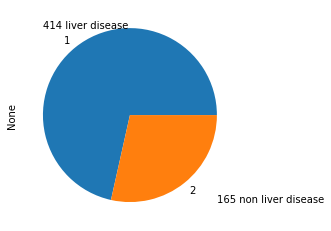

In [3]:

df.groupby(['Class']).size().plot.pie()

one=len(df[df['Class']==1])
two=len(df[df['Class']==2])
print(one,two)
plt.annotate(str(one)+ " liver disease", xy=(-1,1))
plt.annotate(str(two)+ " non liver disease", xy=(1,-1))

plt.show()

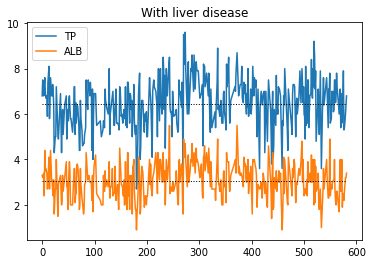

Variance is high for TP and ALB between Liver disease With/With Out


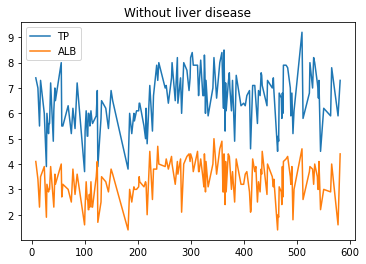

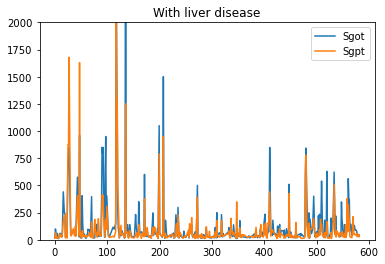

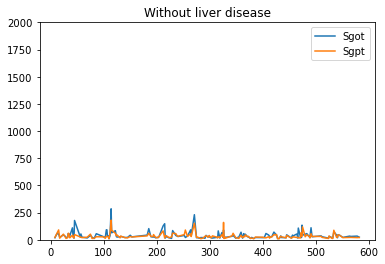

Without liver patients have low Sgot and Sgpt values


In [4]:
filterWith=df['Target']==1
filterWithOut=df['Target']==0


tp_mean=df[filterWith]['TP'].mean()
tp_max=max(df[filterWith]['TP'].index)

tp_mean2=df[filterWith]['ALB'].mean()
tp_max2=max(df[filterWith]['ALB'].index)

xs=range(0,tp_max)
ys=[tp_mean]*tp_max

xs2=range(0,tp_max2)
ys2=[tp_mean2]*tp_max2


#plt.plot(xs2, ys2,'k-', linestyle = ":", lw=1)


df[filterWith][['TP','ALB']].plot()
plt.title('With liver disease')
plt.plot(xs, ys,'k-', linestyle = ":", lw=1)
plt.plot(xs2, ys2,'k-', linestyle = ":", lw=1)
plt.show()

print('Variance is high for TP and ALB between Liver disease With/With Out')

df[filterWithOut][['TP','ALB']].plot()
plt.title('Without liver disease')
plt.show()

df[filterWith][['Sgot','Sgpt']].plot()
plt.ylim(0,2000)
plt.title('With liver disease')
plt.show()

df[filterWithOut][['Sgot','Sgpt']].plot()
plt.ylim(0,2000)
plt.title('Without liver disease')
plt.show()

print("Without liver patients have low Sgot and Sgpt values")


Sgot Aspartate Aminotransferase
Sgpt Alamine Aminotransferase
TP Total Protiens
ALB Albumin
AAP Alkphos Alkaline Phosphotase


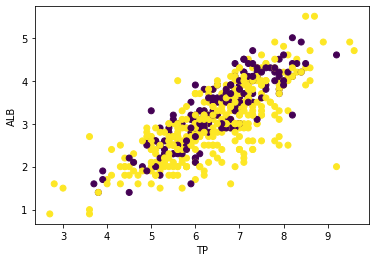

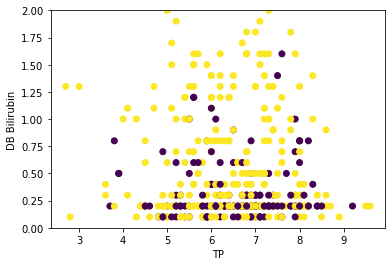

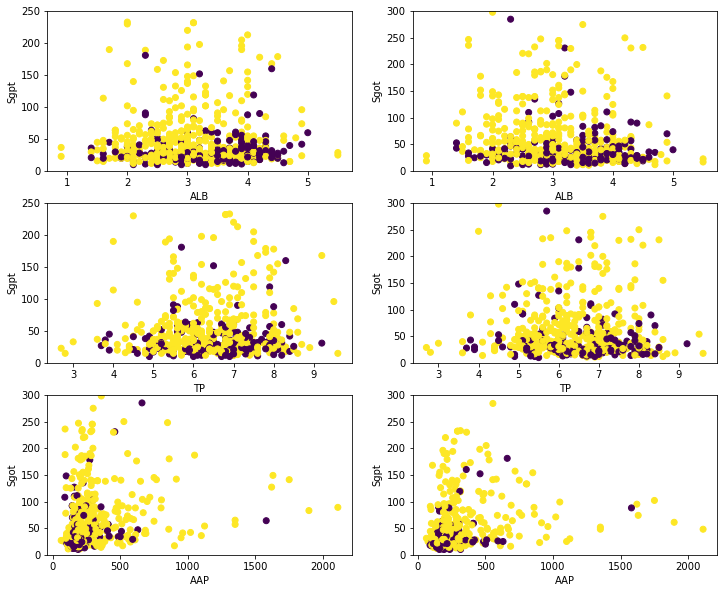

In [5]:
print("Sgot Aspartate Aminotransferase")
print("Sgpt Alamine Aminotransferase")
print("TP Total Protiens")
print("ALB Albumin")
print("AAP Alkphos Alkaline Phosphotase")

plt.scatter(x='TP',y='ALB',data=df, c='Target')
plt.xlabel('TP')
plt.ylabel('ALB')
plt.show()

plt.scatter(x='TP',y='DB_bilirubin',data=df, c='Target')
plt.xlabel('TP')
plt.ylim(0,2.0)
plt.ylabel('DB Bilirubin')
plt.show()



fig,ax = plt.subplots(3,2,figsize=(12,10))
#Sgot',y='Sgpt'
ax[0][0].scatter(x='ALB',y='Sgpt',data=df, c='Target')
ax[0][0].set_ylim(0,250)
ax[0][0].set_xlabel('ALB')
ax[0][0].set_ylabel('Sgpt')

ax[1][0].scatter(x='TP',y='Sgpt',data=df, c='Target')
ax[1][0].set_ylim(0,250)
ax[1][0].set_xlabel('TP')
ax[1][0].set_ylabel('Sgpt')

ax[0][1].scatter(x='ALB',y='Sgot',data=df, c='Target')
ax[0][1].set_ylim(0,300)
ax[0][1].set_xlabel('ALB')
ax[0][1].set_ylabel('Sgot')

ax[1][1].scatter(x='TP',y='Sgot',data=df, c='Target')
ax[1][1].set_ylim(0,300)
ax[1][1].set_xlabel('TP')
ax[1][1].set_ylabel('Sgot')

ax[2][0].scatter(x='AAP',y='Sgot',data=df, c='Target')
ax[2][0].set_ylim(0,300)
ax[2][0].set_xlabel('AAP')
ax[2][0].set_ylabel('Sgot')

ax[2][1].scatter(x='AAP',y='Sgpt',data=df, c='Target')
ax[2][1].set_ylim(0,300)
ax[2][1].set_xlabel('AAP')
ax[2][1].set_ylabel('Sgpt')

plt.show()

#'Sgot','Sgpt',

In [ ]:
correlations=df.corr()
plt.figure(figsize=(8,4))
sns.heatmap(correlations,annot=True)
plt.show()

In [ ]:
print(df.groupby(['Gender','Target']).size())


sns.countplot(x='Gender',hue='Target',data=df)
plt.title('Liver Disease by Gender')
plt.legend(['Female','Male'])
plt.show()

In [ ]:
#model = glm('Target ~ AAP+Sgot+Sgpt+TP+ALB+TB_bilirubin+DB_bilirubin+Age+C(Gender)', data =df, family = sm.families.Binomial()).fit()
model = glm('Target ~ TP+TB_bilirubin+Age', data =df, family = sm.families.Binomial()).fit()

# Display model results
print(model.summary())
print(df['TP'].min(),df['TP'].max())

In [ ]:
df['TP2']=0
df['TB_bilirubin2']=0
model = glm('Target ~ TP+TP2+TB_bilirubin+TB_bilirubin2', data =df, family = sm.families.Binomial()).fit()

mean_tp= df['TP'].mean()

df2=pd.DataFrame()
df2['TP']=np.linspace(2.7,9.6,len(df))
df2['TP2']=df2['TP']**2
df2['TB_bilirubin']=np.linspace(0.4,75,len(df))
df2['TB_bilirubin2']=df2['TB_bilirubin']**2

factor=.5
df3=pd.DataFrame()
df3['TP']=np.linspace(2.7,9.6,len(df))
df3['TP2']=df3['TP']**2
df3['TB_bilirubin']=np.linspace(0.4,75*factor,len(df))
df3['TB_bilirubin2']=df3['TB_bilirubin']**2

pred1=model.predict(df2)
pred2=model.predict(df3)

plt.plot(df2['TP'],pred1,label='TP1')
plt.plot(df3['TP'],pred2,label='TP2')
#plt.plot(df['Target'],'o',alpha=0.5)
plt.xlabel('TP')
plt.ylabel('Liver Disease')
plt.legend()
plt.show()

print('The graph show the prediction of liver disease by tp and tb bilirubin. tp2 shows the prediction if tb bilirubin is decreased by 50%')


In [ ]:
filter=df['Target']==1
df[filter]['DB_bilirubin'].plot()
filter=df['Target']==0
df[filter]['DB_bilirubin'].plot()
plt.legend(['With','With Out'])
plt.show()


filter=df['Target']==1
df[filter]['TP'].plot()
filter=df['Target']==0
df[filter]['TP'].plot()
plt.legend(['With','With Out'])
plt.show()



In [ ]:
fig,ax = plt.subplots(figsize=(10,16))
grouped=df.groupby('Age').size().sort_values(ascending=False).plot(kind='barh',ax=ax)




In [ ]:
df2=pd.DataFrame()
df2['TP']=np.linspace(3,9,50)
df2['TB_bilirubin']=np.linspace(5,20,50)
df2['Age']=np.linspace(10,60,50)

prediction=model.predict(df2)

plt.plot(df2['TB_bilirubin'],prediction)
plt.plot(df2['TP'],prediction)
plt.plot(df2['Age'],prediction)
plt.xlabel('TB_bilirubin')
plt.ylabel('Probability of liver disease')
plt.legend(['TB','TP','Age'])

print("High levels of TB bilirubin seem to contribute most to liver disease")

In [ ]:
pipeline = Pipeline([('lr', LogisticRegression(penalty='l2',C=10))])


NUMERIC=['Age','Gender','TB_bilirubin','DB_bilirubin',
                                                    'AAP',
                                                    'Sgpt',
                                                    'Sgot',
                                                    'TP',
                                                    'ALB',
                                                    'AG_Ratio',
                                                    'Class']
scaler=StandardScaler()
X=scaler.fit_transform(df[NUMERIC])
y=np.array(df['Target'])

X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)

pipeline.fit(X_train,y_train)

y_pred_prob=pipeline.predict_proba(X_test)

predictions=pipeline.predict(X_test)
#print(predictions)

sns.countplot(x=predictions, orient='h')
plt.show()
#print(predictions[:,0])

print("Coefficients {} Intercept {}".format(pipeline['lr'].coef_,pipeline['lr'].intercept_))

print('Coefficients close to zero will contribute little to the end result')

num_err = np.sum(y != pipeline.predict(X))
print("Number of errors:", num_err)

inds_ascending = np.argsort(pipeline['lr'].coef_.flatten()) 


def my_loss(y,w):
    s = 0
    for i in range(y.size):
        # Get the true and predicted target values for example 'i'
        y_i_true = y[i]
        y_i_pred = w[i]
        s = s + (y_i_true - y_i_pred)**2
    return s

print("Loss:",my_loss(y_test,predictions))

fpr, tpr, threshholds = roc_curve(y_test,y_pred_prob[:,1])

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

accuracy=round(pipeline['lr'].score(X_train, y_train) * 100, 2)

print("Model Accuracy={accuracy}".format(accuracy=accuracy))



In [ ]:
confusion_matrix = confusion_matrix(y_test,predictions)

class_names=[1,2,3]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
g=sns.JointGrid(data=df, x='TB_bilirubin', y='TP')
g=g.plot_joint(sns.kdeplot)
g=g.plot_joint(sns.scatterplot)
g=g.plot_marginals(sns.kdeplot, shade=True)